DATA MINING

- Import librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data22 = pd.read_csv("./data/atenciones_2022.csv", sep=";")
data23 = pd.read_csv("./data/atenciones_2023.csv", sep=";", encoding='latin-1')
print(data22.shape)
print(data23.shape)

(513530, 23)
(307145, 23)


In [3]:
print(data22.columns==data23.columns)
data = pd.concat([data22, data23], axis=0)
data.reset_index(inplace=True, drop=True)
data.shape

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


(820675, 23)

In [4]:
pd.set_option("display.max_columns", None)
data.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,62,SIS GRATUITO,909,Teleorientación,20221201,NaN,NaN,0.00,20230525
1,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,61,SIS GRATUITO,56,Consulta externa,20221115,NaN,NaN,5.92,20230525
2,112180,202207,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnóstico (*),20220628,NaN,NaN,222.04,20230525
3,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221111,NaN,NaN,23.45,20230525
4,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221130,NaN,NaN,23.45,20230525


In [5]:
data.tail()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
820670,99961,202303,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,86,SIS PARA TODOS,909,Teleorientacion,20230216,NaN,NaN,0.00,20231113
820671,99970,202301,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,65,SIS GRATUITO,56,Consulta externa,20221214,NaN,NaN,9.18,20231113
820672,99970,202302,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,65,SIS GRATUITO,901,Apoyo al Tratamiento,20230201,NaN,NaN,12.55,20231113
820673,99970,202303,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,65,SIS GRATUITO,71,Apoyo al diagnóstico,20221216,NaN,NaN,155.47,20231113
820674,99982,202302,7633,HOSPITAL NACIONAL CAYETANO HEREDIA,LIMA,Lima,Lima,San Martin de Porres,150135.0,C502,TUMOR MALIGNO DEL CUADRANTE SUPERIOR INTERNO D...,CANCER DE MAMA,ONCOLOGICAS,FEMENINO,78,SIS PARA TODOS,56,Consulta externa,20221222,NaN,NaN,0.50,20231113


DATA CLEANING

- Identify and convert data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820675 entries, 0 to 820674
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DOCUMENTO_ANONIMIZADO  820675 non-null  int64  
 1   PERIODO                820675 non-null  int64  
 2   RENAES                 820675 non-null  int64  
 3   IPRESS                 820531 non-null  object 
 4   REGION                 820675 non-null  object 
 5   DEPARTAMENTO           804639 non-null  object 
 6   PROVINCIA              804639 non-null  object 
 7   DISTRITO               804639 non-null  object 
 8   UBIGEO                 795790 non-null  float64
 9   CODIGO_DIAGNOSTICO     820675 non-null  object 
 10  DIAGNOSTICOS           820675 non-null  object 
 11  GRUPO_DIAGNOSTICOS     820675 non-null  object 
 12  GRUPO_COBERTURA        820675 non-null  object 
 13  SEXO                   820675 non-null  object 
 14  EDAD                   820675 non-nu

In [7]:
data["UBIGEO"] = data["UBIGEO"].astype("Int64")
data["FECHA_INTERNAMIENTO"] = data["FECHA_INTERNAMIENTO"].astype("Int64")
data["FECHA_ALTA"] = data["FECHA_ALTA"].astype("Int64")

- Identify and complete missing values

FECHA_INTERNAMIENTO    91.104274
FECHA_ALTA             80.274043
UBIGEO                  3.032260
DEPARTAMENTO            1.954001
PROVINCIA               1.954001
DISTRITO                1.954001
IPRESS                  0.017547
dtype: float64


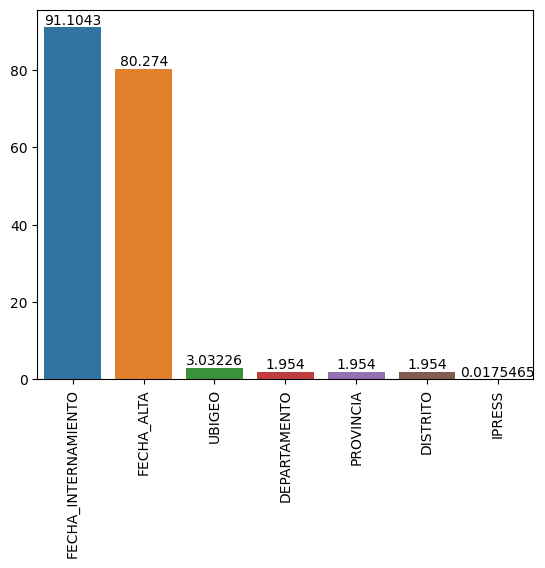

In [8]:
data_isna=data.isna().sum().sort_values(ascending=False)
data_isna_perc=(data_isna[data_isna>0]*100)/len(data)
print(data_isna_perc)
plt.xticks(rotation="vertical")
ax=sns.barplot(x=data_isna_perc.index, y=data_isna_perc)
ax.bar_label(ax.containers[0])
plt.show() 

In [9]:
# Imputar con 0 las fechas nulas
data["FECHA_INTERNAMIENTO"].fillna(0, inplace=True)
data["FECHA_ALTA"].fillna(0, inplace=True)

In [10]:
data[data["DEPARTAMENTO"].isna()]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
540,96260,202201,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C508,LESION DE SITIOS CONTIGUOS DE LA MAMA,CANCER DE MAMA,ONCOLOGICAS,FEMENINO,55,SIS GRATUITO,56,Consulta externa,20211124,20211124,20211124,8.330,20230525
541,96260,202202,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C500,TUMOR MALIGNO DEL PEZON Y AREOLA MAMARIA,CANCER DE MAMA,ONCOLOGICAS,FEMENINO,55,SIS GRATUITO,901,Apoyo al Tratamiento,20211130,20211130,20211130,251.500,20230525
542,96260,202202,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,55,SIS GRATUITO,56,Consulta externa,20211119,20211119,20211119,58.020,20230525
543,96260,202202,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,55,SIS GRATUITO,56,Consulta externa,20211126,20211126,20211126,58.020,20230525
544,96260,202202,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,55,SIS GRATUITO,56,Consulta externa,20211123,20211123,20211123,58.480,20230525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501562,84588,202207,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C910,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,ONCOLOGICAS,FEMENINO,6,SIS GRATUITO,56,Consulta externa,20220510,20220510,20220510,33.255,20230525
501563,84588,202206,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C910,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,ONCOLOGICAS,FEMENINO,6,SIS GRATUITO,56,Consulta externa,20220316,20220316,20220316,73.260,20230525
501564,84588,202211,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C910,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,ONCOLOGICAS,FEMENINO,6,SIS GRATUITO,56,Consulta externa,20220713,0,20220713,20.040,20230525
504631,94789,202205,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,NaN,NaN,NaN,<NA>,C950,"LEUCEMIA AGUDA, CELULAS DE TIPO NO ESPECIFICADO",LEUCEMIA,ONCOLOGICAS,FEMENINO,4,SIS GRATUITO,907,Atención por Telesalud,20220308,20220308,20220308,0.000,20230525


In [11]:
data[data["DEPARTAMENTO"].isna()]["IPRESS"].value_counts()

IPRESS
INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO – IREN CENTRO    16024
HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS                   12
Name: count, dtype: int64

In [12]:
data[data["UBIGEO"].isna()]["IPRESS"].value_counts()

IPRESS
INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO – IREN CENTRO    16024
INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO  IREN CENTRO     8834
HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS                   27
Name: count, dtype: int64

In [13]:
data["IPRESS"] = data["IPRESS"].str.replace("", "–")

In [14]:
# Imputar datos de las IPRESS IREN CENTRO
index1 = data[data["IPRESS"]=="INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO – IREN CENTRO"].index
data.iloc[index1, 5:9] = ["Junin", "Concepcion", "Concepcion", 120201]

In [15]:
# Imputar datos de las IPRESS IREN CENTRO
index2 = data[data["IPRESS"]=="HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS"].index
data.iloc[index2, 5:9] = ["Arequipa", "Caylloma", "Majes", 40520]

In [16]:
data[data["IPRESS"].isna()]["RENAES"].value_counts()

RENAES
308    144
Name: count, dtype: int64

In [17]:
# Imputar datos de las IPRESS NAN
index3 = data[data["IPRESS"].isna()].index
data.iloc[index3, 3] = "HOSPITAL REGIONAL DOCENTE DE MEDICINA TROPICAL DR. JULIO CESAR DEMARINI CARO"

In [18]:
index4=data[(data["IPRESS"]=="HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS")&data["UBIGEO"].isna()].index
data.iloc[index4, 8] = 40520

In [19]:
# Imputar datos de las UBIGEO NAN Y DISTRITO ES CONCEPCION
index3 = data[data["IPRESS"].isna()].index
data.iloc[index3, 3] = "HOSPITAL REGIONAL DOCENTE DE MEDICINA TROPICAL DR. JULIO CESAR DEMARINI CARO"

- Identify and correct outliers

In [20]:
#Tukey method
def detect_outliers(df,n,features):

    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers 

In [21]:
numfeat = ["EDAD", "MONTO_BRUTO"]
outliers = detect_outliers(data,2,numfeat)
data.loc[outliers,numfeat]

,EDAD,MONTO_BRUTO


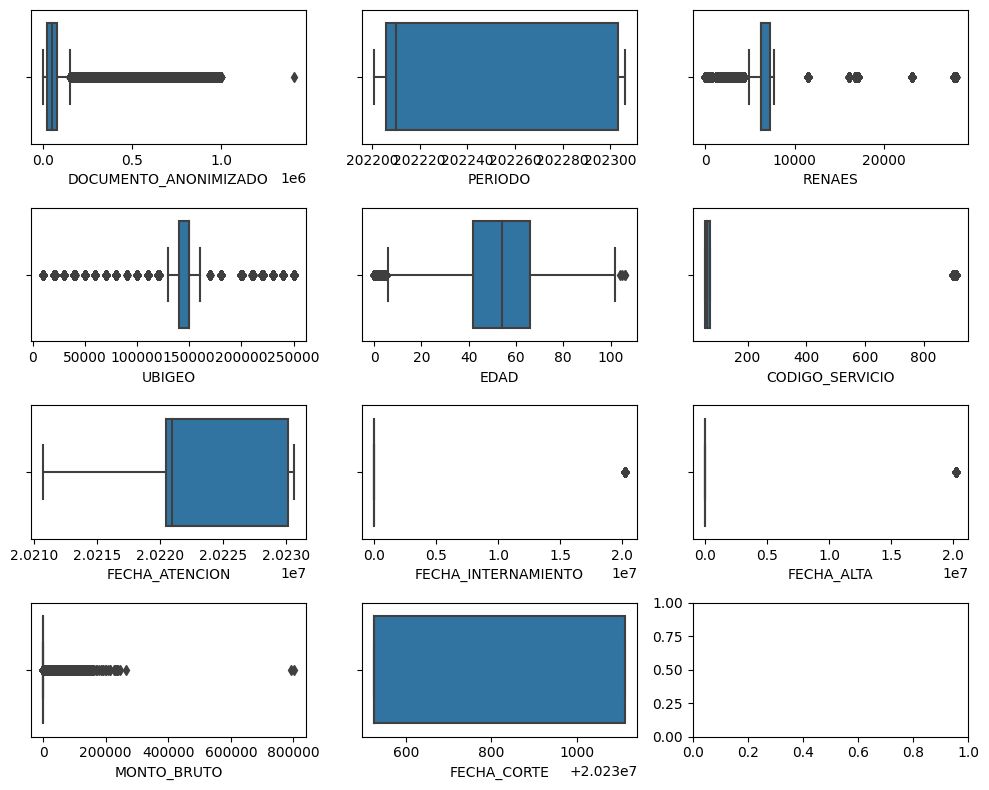

In [22]:
numfeat = data.select_dtypes(include=[np.number]).columns
fig, ax = plt.subplots(4, 3, figsize=(10, 8))
for i, col in enumerate(numfeat):
    x = i // 3
    y = i % 3
    hp=sns.boxplot(data=data, x=col, ax=ax[x, y]) 
    hp.set(ylabel=None)
plt.tight_layout()
plt.show()

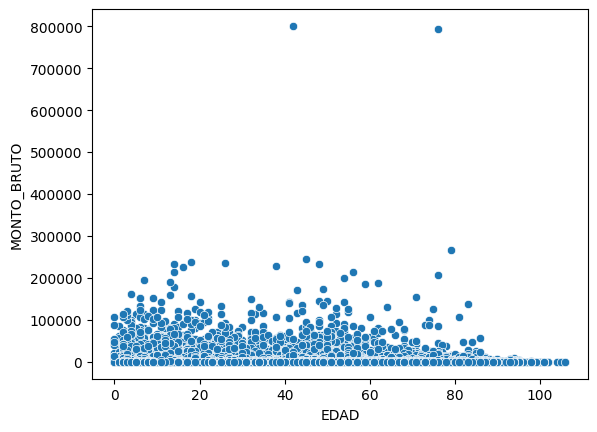

In [23]:
sns.scatterplot(x="EDAD", y="MONTO_BRUTO", data=data)
plt.show()

In [24]:
data[data["MONTO_BRUTO"]>500000]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
42580,18950,202208,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,Junin,Concepcion,Concepcion,120201,C859,"LINFOMA NO HODGKIN, NO ESPECIFICADO",LINFOMA,ONCOLOGICAS,MASCULINO,76,SIS GRATUITO,65,Internamiento en EESS sin intervención quirúrgica,20220606,20220524,20220606,792271.163,20230525
430239,99844,202209,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,JUNIN,Junin,Concepcion,Concepcion,120201,C531,TUMOR MALIGNO DE EXOCERVIX,CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,42,SIS GRATUITO,67,Internamiento con intervención quirúrgica mayor,20220728,20220721,20220728,800740.915,20230525


In [25]:
print(data[data["DIAGNOSTICOS"]=="LINFOMA NO HODGKIN, NO ESPECIFICADO"]["MONTO_BRUTO"].value_counts().sort_index(ascending=False).head())
print(data[data["DIAGNOSTICOS"]=="TUMOR MALIGNO DE EXOCERVIX"]["MONTO_BRUTO"].value_counts().sort_index(ascending=False).head())

MONTO_BRUTO
792271.163    1
265966.280    1
214401.538    1
126176.680    1
83150.740     1
Name: count, dtype: int64
MONTO_BRUTO
800740.915    1
207780.270    1
150875.963    1
143330.558    1
138749.364    1
Name: count, dtype: int64


In [26]:
data.drop([42580, 430239], axis=0, inplace=True)

- Cleaning data string

In [27]:
data.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,62,SIS GRATUITO,909,Teleorientación,20221201,0,0,0.00,20230525
1,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,61,SIS GRATUITO,56,Consulta externa,20221115,0,0,5.92,20230525
2,112180,202207,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnóstico (*),20220628,0,0,222.04,20230525
3,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221111,0,0,23.45,20230525
4,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221130,0,0,23.45,20230525


In [28]:
pd.set_option("display.max_rows", None)
data[["RENAES","IPRESS"]].value_counts().sort_index()

RENAES  IPRESS                                                                         
1       HOSPITAL IQUITOS "CESAR GARAYAR GARCÍA"                                                84
3       HOSPITAL REGIONAL DE LORETO "FELIPE SANTIAGO ARRIOLA IGLESIAS"                       2539
308     HOSPITAL REGIONAL DOCENTE DE MEDICINA TROPICAL DR. JULIO CESAR DEMARINI CARO          231
520     DE APOYO FELIX MAYORCA SOTO                                                           175
753     HOSPITAL REGIONAL DOCENTE CLINICO QUIRURGICO DANIEL ALCIDES CARRION DE HUANCAYO       379
754     HOSPITAL REGIONAL HERMILIO VALDIZAN                                                   722
1231    HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA                                           1648
1232    HOSPITAL III GOYENECHE                                                               9299
1344    HOSPITAL DE CAMANA                                                                     50
1382    HOSPITAL APLAO        

In [29]:
data[["DEPARTAMENTO"]].value_counts().sort_index()

DEPARTAMENTO 
Amazonas            227
Ancash             2858
Apurimac            467
Arequipa          35933
Ayacucho           1863
Cajamarca          3788
Callao            10079
Cusco              9207
Huancavelica         85
Huanuco             722
Ica                2580
Junin             25666
La Libertad       88808
Lambayeque        27060
Lima             595736
Loreto             2623
Madre de Dios        76
Moquegua            312
Piura              8686
Puno                214
San Martin         1817
Tacna              1089
Tumbes              413
Ucayali             364
Name: count, dtype: int64

In [30]:
data[["CODIGO_DIAGNOSTICO", "DIAGNOSTICOS"]].value_counts().sort_index()

CODIGO_DIAGNOSTICO  DIAGNOSTICOS                                                                          
C160                TUMOR MALIGNO DEL CARDIAS                                                                   1586
C161                TUMOR MALIGNO DEL FUNDUS GASTRICO                                                           1078
C162                TUMOR MALIGNO DEL CUERPO DEL ESTOMAGO                                                       3280
C163                TUMOR MALIGNO DEL ANTRO PILORICO                                                            5803
C164                TUMOR MALIGNO DEL PILORO                                                                     154
C165                TUMOR MALIGNO DE LA CURVATURA MENOR DEL ESTOMAGO, SIN OTRA ESPECIFICACION                    225
C166                TUMOR MALIGNO DE LA CURVATURA MAYOR DEL ESTOMAGO, SIN OTRA ESPECIFICACION                    150
C168                LESION DE SITIOS CONTIGUOS DEL ESTOMAGO               

In [31]:
data.columns

Index(['DOCUMENTO_ANONIMIZADO', 'PERIODO', 'RENAES', 'IPRESS', 'REGION',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'CODIGO_DIAGNOSTICO',
       'DIAGNOSTICOS', 'GRUPO_DIAGNOSTICOS', 'GRUPO_COBERTURA', 'SEXO', 'EDAD',
       'TIPO_SEGURO', 'CODIGO_SERVICIO', 'SERVICIO', 'FECHA_ATENCION',
       'FECHA_INTERNAMIENTO', 'FECHA_ALTA', 'MONTO_BRUTO', 'FECHA_CORTE'],
      dtype='object')

In [32]:
data[["GRUPO_DIAGNOSTICOS"]].value_counts().sort_index()

GRUPO_DIAGNOSTICOS      
CANCER DE COLON              51284
CANCER DE CUELLO UTERINO    148581
CANCER DE ESTOMAGO           55268
CANCER DE MAMA              299901
CANCER DE PROSTATA           71649
LEUCEMIA                    111980
LINFOMA                      82010
Name: count, dtype: int64

In [33]:
data[["TIPO_SEGURO"]].value_counts().sort_index()

TIPO_SEGURO      
SIS EMPRENDEDOR       12452
SIS GRATUITO         521510
SIS INDEPENDIENTE     31554
SIS MICROEMPRESAS       340
SIS PARA TODOS       254817
Name: count, dtype: int64

In [34]:
data[["SERVICIO"]].value_counts()

SERVICIO                                                            
Consulta externa                                                        403497
Apoyo al diagnóstico (*)                                                143524
Apoyo al Tratamiento                                                     79243
Apoyo al diagnóstico                                                     78048
Intervención médico-quirúrgica ambulatoria                               21039
Atención por emergencia                                                  16459
Internamiento en EESS sin intervención quirúrgica                        12925
Teleorientación                                                          12703
Teleorientacion                                                          11211
Telemonitoreo con Prescripción y Entrega de Medicamentos                 10892
Consulta externa por profesionales no médicos ni odontólogos              7568
Atención en tópico                                            

In [35]:
import spacy
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
spanish_stopwords = [x.upper() for x in stopwords.words('spanish')]
nlp = spacy.load("es_core_news_sm")

def preprocess(texto):
    if isinstance(texto, str):
        texto = unidecode(texto)
        doc = nlp(texto, disable=['ner', 'parser'])
        lemmas = [token.lemma_ for token in doc]
        a_lemmas = [lemma.upper() for lemma in lemmas if lemma.isalpha() and lemma not in spanish_stopwords]
        return ' '.join(a_lemmas)
    else:
        return texto

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
data["SERVICIO"] = data["SERVICIO"].apply(preprocess)
data["SERVICIO"].value_counts()

SERVICIO
CONSULTA EXTERNO                                                      403497
APOYO AL DIAGNOSTICO                                                  221572
APOYO AL TRATAMIENTO                                                   79243
TELEORIENTACION                                                        23914
INTERVENCION AMBULATORIO                                               21039
ATENCION POR EMERGENCIA                                                16459
TELEMONITOREO CON PRESCRIPCION Y ENTREGA DE MEDICAMENTOS               14601
INTERNAMIENTO EN EESS SIN INTERVENCION QUIRURGICO                      12925
CONSULTA EXTERNO POR PROFESIONAL NO MEDICO NI ODONTOLOGO                7568
ATENCION EN TOPICO                                                      6524
INTERNAMIENTO CON INTERVENCION QUIRURGICO MAYOR                         5762
ATENCION POR EMERGENCIA CON OBSERVACION                                 3879
INTERNAMIENTO CON INTERVENCION QUIRURGICO MENOR                    

In [37]:
index5=data[data["SERVICIO"]=="INTERNAMIENTOCON ESTANCIA EN EL UNIDAD DE CUIDADOS INTENSIVOS UCI"].index
data.loc[index5, "SERVICIO"] = "INTERNAMIENTO CON ESTANCIA EN EL UNIDAD DE CUIDADOS INTENSIVOS UCI"

- Remove duplicates

In [38]:
# rows duplicated
data[data.duplicated(keep=False)]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
2176,357910,202202,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,La Libertad,Trujillo,Trujillo,130101,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,47,SIS INDEPENDIENTE,56,CONSULTA EXTERNO,20220107,20220107,20220107,10.55,20230525
2182,357910,202202,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,La Libertad,Trujillo,Trujillo,130101,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,47,SIS INDEPENDIENTE,56,CONSULTA EXTERNO,20220107,20220107,20220107,10.55,20230525
2515,71980,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,46,SIS PARA TODOS,71,APOYO AL DIAGNOSTICO,20221114,0,0,17.04,20230525
2516,71980,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,46,SIS PARA TODOS,71,APOYO AL DIAGNOSTICO,20221114,0,0,17.04,20230525
3367,720340,202204,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C920,LEUCEMIA MIELOIDE AGUDA,LEUCEMIA,ONCOLOGICAS,MASCULINO,14,SIS GRATUITO,71,APOYO AL DIAGNOSTICO,20220221,0,0,0.00,20230525
3368,720340,202204,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C920,LEUCEMIA MIELOIDE AGUDA,LEUCEMIA,ONCOLOGICAS,MASCULINO,14,SIS GRATUITO,71,APOYO AL DIAGNOSTICO,20220221,0,0,0.00,20230525
5294,92180,202202,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,La Libertad,Trujillo,Trujillo,130101,C181,TUMOR MALIGNO DEL APENDICE,CANCER DE COLON,ONCOLOGICAS,FEMENINO,78,SIS GRATUITO,56,CONSULTA EXTERNO,20220124,20220124,20220124,10.55,20230525
5295,92180,202202,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,La Libertad,Trujillo,Trujillo,130101,C181,TUMOR MALIGNO DEL APENDICE,CANCER DE COLON,ONCOLOGICAS,FEMENINO,78,SIS GRATUITO,56,CONSULTA EXTERNO,20220124,20220124,20220124,10.55,20230525
5484,16670,202205,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,La Libertad,Trujillo,Trujillo,130101,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,59,SIS GRATUITO,56,CONSULTA EXTERNO,20220427,20220427,20220427,10.55,20230525
5485,16670,202205,7277,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS...,LA LIBERTAD,La Libertad,Trujillo,Trujillo,130101,C509,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,ONCOLOGICAS,FEMENINO,59,SIS GRATUITO,56,CONSULTA EXTERNO,20220427,20220427,20220427,10.55,20230525


In [39]:
# Remove
data1 = data.drop_duplicates(keep="first") #last-first
print(data.shape)
print(data1.shape)

(820673, 23)
(819933, 23)


FEATURE ENGINEERING

- Feature creation

In [40]:
data1.head()

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,62,SIS GRATUITO,909,TELEORIENTACION,20221201,0,0,0.00,20230525
1,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,61,SIS GRATUITO,56,CONSULTA EXTERNO,20221115,0,0,5.92,20230525
2,112180,202207,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,71,APOYO AL DIAGNOSTICO,20220628,0,0,222.04,20230525
3,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,CONSULTA EXTERNO,20221111,0,0,23.45,20230525
4,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,CONSULTA EXTERNO,20221130,0,0,23.45,20230525


In [41]:
#data1["FECHA_ATENCION"] = pd.to_datetime(data1["FECHA_ATENCION"], format="%Y%m%d")

In [42]:
#data1.to_csv("data_total.csv", index=False, encoding="utf-8")

In [43]:
#data1 = pd.read_csv("./data_total.csv", encoding="utf-8")

In [44]:
print(data1[data1["FECHA_ALTA"]!=0].shape)
print(data1[data1["FECHA_INTERNAMIENTO"]!=0].shape)

(161392, 23)
(72704, 23)


In [45]:
data1["DEPARTAMENTO"].value_counts().sort_index()

DEPARTAMENTO
Amazonas            227
Ancash             2858
Apurimac            466
Arequipa          35931
Ayacucho           1863
Cajamarca          3788
Callao            10066
Cusco              9203
Huancavelica         85
Huanuco             721
Ica                2580
Junin             25663
La Libertad       88337
Lambayeque        27028
Lima             595527
Loreto             2622
Madre de Dios        76
Moquegua            312
Piura              8683
Puno                214
San Martin         1817
Tacna              1089
Tumbes              413
Ucayali             364
Name: count, dtype: int64

In [46]:
data1["FECHA_ATENCION"].value_counts().sort_index()

FECHA_ATENCION
20210714       1
20210721       1
20210726       1
20210727       2
20210802       1
20210805       2
20210809       1
20210811       1
20210814       4
20210816       5
20210817       2
20210818      11
20210819      15
20210820      12
20210821       7
20210823       6
20210824       3
20210825       8
20210826       6
20210827       6
20210828      15
20210830      10
20210831       9
20210901      10
20210902       4
20210903       6
20210904      11
20210906       9
20210907       4
20210908       5
20210909       6
20210910      12
20210911       9
20210913       5
20210914       9
20210915      10
20210916      11
20210917       8
20210918      12
20210919       1
20210920      11
20210921      16
20210922       3
20210923       6
20210924       7
20210925      20
20210927      18
20210928      11
20210929       9
20210930      13
20211001      15
20211002      20
20211004      92
20211005      97
20211006     121
20211007     176
20211008       3
20211009      89

In [47]:
bins = pd.IntervalIndex.from_tuples([(-1, 18), (18, 40), (40, 55), (55,70),(70, 200)])
data1["EDAD_RANGO"]=pd.cut(data1["EDAD"],bins)

C:\Users\kevin\AppData\Local\Temp\ipykernel_6632\240939060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["EDAD_RANGO"]=pd.cut(data1["EDAD"],bins)


In [48]:
data1["EDAD_RANGO"].value_counts()

EDAD_RANGO
(55, 70]     256817
(40, 55]     247515
(70, 200]    129090
(18, 40]     116308
(-1, 18]      70203
Name: count, dtype: int64

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819933 entries, 0 to 820674
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   DOCUMENTO_ANONIMIZADO  819933 non-null  int64   
 1   PERIODO                819933 non-null  int64   
 2   RENAES                 819933 non-null  int64   
 3   IPRESS                 819933 non-null  object  
 4   REGION                 819933 non-null  object  
 5   DEPARTAMENTO           819933 non-null  object  
 6   PROVINCIA              819933 non-null  object  
 7   DISTRITO               819933 non-null  object  
 8   UBIGEO                 819933 non-null  Int64   
 9   CODIGO_DIAGNOSTICO     819933 non-null  object  
 10  DIAGNOSTICOS           819933 non-null  object  
 11  GRUPO_DIAGNOSTICOS     819933 non-null  object  
 12  GRUPO_COBERTURA        819933 non-null  object  
 13  SEXO                   819933 non-null  object  
 14  EDAD                   81

In [50]:
# Creando nuevos feature a partir de fechas
data1["FECHA_ATENCION"] = pd.to_datetime(data1["FECHA_ATENCION"], format='%Y%m%d')
data1['FECHA_INTERNAMIENTO'] = pd.to_datetime(data1['FECHA_INTERNAMIENTO'], format='%Y%m%d', errors='coerce')
data1['FECHA_ALTA'] = pd.to_datetime(data1['FECHA_ALTA'], format='%Y%m%d', errors='coerce')
data1["DURACION_INTER"] = data1['FECHA_ALTA'] - data1['FECHA_INTERNAMIENTO']
data1["ESPERA_INTER"] = data1['FECHA_INTERNAMIENTO'] - data1['FECHA_ATENCION']
data1["DURACION_ATENCION"] = data1['FECHA_ALTA'] - data1['FECHA_ATENCION']
data1.info()

C:\Users\kevin\AppData\Local\Temp\ipykernel_6632\167939045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["FECHA_ATENCION"] = pd.to_datetime(data1["FECHA_ATENCION"], format='%Y%m%d')
C:\Users\kevin\AppData\Local\Temp\ipykernel_6632\167939045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FECHA_INTERNAMIENTO'] = pd.to_datetime(data1['FECHA_INTERNAMIENTO'], format='%Y%m%d', errors='coerce')
C:\Users\kevin\AppData\Local\Temp\ipykernel_6632\167939045.py:4: SettingWithCopyWarning: 
A value

<class 'pandas.core.frame.DataFrame'>
Index: 819933 entries, 0 to 820674
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   DOCUMENTO_ANONIMIZADO  819933 non-null  int64          
 1   PERIODO                819933 non-null  int64          
 2   RENAES                 819933 non-null  int64          
 3   IPRESS                 819933 non-null  object         
 4   REGION                 819933 non-null  object         
 5   DEPARTAMENTO           819933 non-null  object         
 6   PROVINCIA              819933 non-null  object         
 7   DISTRITO               819933 non-null  object         
 8   UBIGEO                 819933 non-null  Int64          
 9   CODIGO_DIAGNOSTICO     819933 non-null  object         
 10  DIAGNOSTICOS           819933 non-null  object         
 11  GRUPO_DIAGNOSTICOS     819933 non-null  object         
 12  GRUPO_COBERTURA        819933 non-n

In [51]:
data1["INTERNAMIENTO"] = (data1['FECHA_INTERNAMIENTO'].notna()).astype(int)
data1["ALTA"] = (data1['FECHA_ALTA'].notna()).astype(int)

C:\Users\kevin\AppData\Local\Temp\ipykernel_6632\4056936617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["INTERNAMIENTO"] = (data1['FECHA_INTERNAMIENTO'].notna()).astype(int)
C:\Users\kevin\AppData\Local\Temp\ipykernel_6632\4056936617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["ALTA"] = (data1['FECHA_ALTA'].notna()).astype(int)


In [52]:
# Features para get_dummies
print(data1["IPRESS"].value_counts().shape)
print(data1["DEPARTAMENTO"].value_counts().shape)
print(data1["DIAGNOSTICOS"].value_counts().shape)
print(data1["GRUPO_DIAGNOSTICOS"].value_counts().shape)
print(data1["SEXO"].value_counts().shape)
print(data1["TIPO_SEGURO"].value_counts().shape)
print(data1["SERVICIO"].value_counts().shape)
print(data1["EDAD_RANGO"].value_counts().shape)

# Features restantes para el modelo
# EDAD # MONTO_BRUTO # INTERNAMIENTO # ALTA

(75,)
(24,)
(100,)
(7,)
(2,)
(5,)
(17,)
(5,)


In [53]:
# GET_DUMMIES
cols = ["IPRESS", "DEPARTAMENTO", "DIAGNOSTICOS", "GRUPO_DIAGNOSTICOS", "SEXO", "TIPO_SEGURO", "SERVICIO", "EDAD_RANGO"]
data2 = pd.get_dummies(data1, columns=cols).reset_index(drop=True)
len(data2.columns)

256

- Feature selection

In [54]:
"""data1.drop(["GRUPO_COBERTURA", "FECHA_CORTE"], axis=1, inplace=True)
data1.columns"""

'data1.drop(["GRUPO_COBERTURA", "FECHA_CORTE"], axis=1, inplace=True)\ndata1.columns'

In [55]:
# Features a eliminar
cols_drop = ["DOCUMENTO_ANONIMIZADO", "PERIODO", "RENAES", "REGION", "PROVINCIA", "DISTRITO", "UBIGEO", "CODIGO_DIAGNOSTICO",
"CODIGO_SERVICIO", "FECHA_ATENCION", "FECHA_INTERNAMIENTO", "FECHA_ALTA", "DURACION_INTER", "ESPERA_INTER", "DURACION_ATENCION", "GRUPO_COBERTURA", "FECHA_CORTE"]
data2.drop(cols_drop, axis=1, inplace=True)
data2.head()

,EDAD,MONTO_BRUTO,INTERNAMIENTO,ALTA,IPRESS_ANTONIO LORENA DEL CUSCO,IPRESS_ATENCION DOMICILIARIA AL ADULTO MAYOR Y PACIENTE ONCOLOGICO (ADAMO),IPRESS_CARLOS MONJE MEDRANO,IPRESS_DE APOYO FELIX MAYORCA SOTO,IPRESS_ELEAZAR GUZMAN BARRON,IPRESS_HOSPITAL AMAZONICO - YARINACOCHA,IPRESS_HOSPITAL APLAO,IPRESS_HOSPITAL BELEN DE TRUJILLO,IPRESS_HOSPITAL CARLOS LANFRANCO LA HOZ,IPRESS_HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS,"IPRESS_HOSPITAL CHANCAY Y SBS ""DR. HIDALGO ATOCHE LOPEZ""",IPRESS_HOSPITAL DE APOYO DEPARTAMENTAL DEL CUSCO,IPRESS_HOSPITAL DE APOYO II - 2 SULLANA,IPRESS_HOSPITAL DE APOYO JESUS NAZARENO,IPRESS_HOSPITAL DE APOYO SAN MIGUEL,IPRESS_HOSPITAL DE APOYO SANTA ROSA,IPRESS_HOSPITAL DE BARRANCA,IPRESS_HOSPITAL DE CAMANA,IPRESS_HOSPITAL DE EMERGENCIAS JOSE CASIMIRO ULLOA,IPRESS_HOSPITAL DE EMERGENCIAS PEDIATRICAS,IPRESS_HOSPITAL DE EMERGENCIAS VILLA EL SALVADOR,IPRESS_HOSPITAL DE LA AMISTAD PERU - COREA SANTA ROSA II-2,IPRESS_HOSPITAL DE MEDIANA COMPLEJIDAD JOSE AGURTO TELLO,IPRESS_HOSPITAL EMERGENCIA ATE VITARTE,IPRESS_HOSPITAL GENERAL DE HUACHO,IPRESS_HOSPITAL HIPOLITO UNANUE DE TACNA,IPRESS_HOSPITAL III GOYENECHE,"IPRESS_HOSPITAL IQUITOS ""CESAR GARAYAR GARCÍA""",IPRESS_HOSPITAL MARIA AUXILIADORA,IPRESS_HOSPITAL MOYOBAMBA,IPRESS_HOSPITAL NACIONAL ARZOBISPO LOAYZA,IPRESS_HOSPITAL NACIONAL CAYETANO HEREDIA,IPRESS_HOSPITAL NACIONAL DOCENTE MADRE NIÑO SAN BARTOLOME,IPRESS_HOSPITAL NACIONAL DOS DE MAYO,IPRESS_HOSPITAL NACIONAL HIPOLITO UNANUE,IPRESS_HOSPITAL NACIONAL SERGIO BERNALES,"IPRESS_HOSPITAL REGIONAL DE AYACUCHO ""MIGUEL ANGEL MARISCAL LLERENA""",IPRESS_HOSPITAL REGIONAL DE LAMBAYEQUE,"IPRESS_HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO ARRIOLA IGLESIAS""",IPRESS_HOSPITAL REGIONAL DE PUCALLPA,IPRESS_HOSPITAL REGIONAL DOCENTE CLINICO QUIRURGICO DANIEL ALCIDES CARRION DE HUANCAYO,IPRESS_HOSPITAL REGIONAL DOCENTE DE MEDICINA TROPICAL DR. JULIO CESAR DEMARINI CARO,IPRESS_HOSPITAL REGIONAL DOCENTE LAS MERCEDES,IPRESS_HOSPITAL REGIONAL GUILLERMO DIAZ DE LA VEGA,IPRESS_HOSPITAL REGIONAL HERMILIO VALDIZAN,IPRESS_HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,IPRESS_HOSPITAL REGIONAL JOSE ALFREDO MENDOZA OLAVARRIA JAMO II-2,IPRESS_HOSPITAL REGIONAL MOQUEGUA,IPRESS_HOSPITAL REGIONAL VIRGEN DE FATIMA,IPRESS_HOSPITAL REGIONAL ZACARIAS CORREA VALDIVIA,IPRESS_HOSPITAL REZOLA,IPRESS_HOSPITAL SAN JOSE,IPRESS_HOSPITAL SAN JUAN BAUTISTA HUARAL,IPRESS_HOSPITAL SAN JUAN DE LURIGANCHO,IPRESS_HOSPITAL SANTA ROSA,IPRESS_HOSPITAL SUB REGIONAL DE ANDAHUAYLAS,IPRESS_HOSPITAL TARAPOTO,IPRESS_HOSPITAL VICTOR RAMOS GUARDIA - HUARAZ,IPRESS_INSTITUTO NACIONAL DE CIENCIAS NEUROLOGICAS,IPRESS_INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS - INEN,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - BREÑA,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - SAN BORJA,IPRESS_INSTITUTO NACIONAL MATERNO PERINATAL,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS – LUIS PINILLOS GANOZA - IREN,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO – IREN CENTRO,IPRESS_LA CALETA,IPRESS_MANUEL NUÑEZ BUTRON,IPRESS_NAC. DANIEL A. CARRION,IPRESS_REGIONAL DE CAJAMARCA,IPRESS_REGIONAL DE ICA,IPRESS_REGIONAL DOCENTE DE TRUJILLO,"IPRESS_REGIONAL DOCENTE MATERNO INFANTIL ""EL CARMEN""",IPRESS_SAN JOSE,IPRESS_SANTA MARIA DEL SOCORRO,DEPARTAMENTO_Amazonas,DEPARTAMENTO_Ancash,DEPARTAMENTO_Apurimac,DEPARTAMENTO_Arequipa,DEPARTAMENTO_Ayacucho,DEPARTAMENTO_Cajamarca,DEPARTAMENTO_Callao,DEPARTAMENTO_Cusco,DEPARTAMENTO_Huancavelica,DEPARTAMENTO_Huanuco,DEPARTAMENTO_Ica,DEPARTAMENTO_Junin,DEPARTAMENTO_La Libertad,DEPARTAMENTO_Lambayeque,DEPARTAMENTO_Lima,DEPARTAMENTO_Loreto,DEPARTAMENTO_Madre de Dios,DEPARTAMENTO_Moquegua,DEPARTAMENTO_Piura,DEPARTAMENTO_Puno,DEPARTAMENTO_San Martin,DEPARTAMENTO_Tacna,DEPARTAMENTO_Tumbes,DEPARTAMENTO_Ucayali,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON CELULARIDAD MIXTA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON DEPLECION LINFOCITICA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON ESCLEROSIS

In [56]:
cols_bool = data2.select_dtypes(include=[bool]).columns
for col in cols_bool:
    data2[col] = data2[col].astype(int)
data2.head()

,EDAD,MONTO_BRUTO,INTERNAMIENTO,ALTA,IPRESS_ANTONIO LORENA DEL CUSCO,IPRESS_ATENCION DOMICILIARIA AL ADULTO MAYOR Y PACIENTE ONCOLOGICO (ADAMO),IPRESS_CARLOS MONJE MEDRANO,IPRESS_DE APOYO FELIX MAYORCA SOTO,IPRESS_ELEAZAR GUZMAN BARRON,IPRESS_HOSPITAL AMAZONICO - YARINACOCHA,IPRESS_HOSPITAL APLAO,IPRESS_HOSPITAL BELEN DE TRUJILLO,IPRESS_HOSPITAL CARLOS LANFRANCO LA HOZ,IPRESS_HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS,"IPRESS_HOSPITAL CHANCAY Y SBS ""DR. HIDALGO ATOCHE LOPEZ""",IPRESS_HOSPITAL DE APOYO DEPARTAMENTAL DEL CUSCO,IPRESS_HOSPITAL DE APOYO II - 2 SULLANA,IPRESS_HOSPITAL DE APOYO JESUS NAZARENO,IPRESS_HOSPITAL DE APOYO SAN MIGUEL,IPRESS_HOSPITAL DE APOYO SANTA ROSA,IPRESS_HOSPITAL DE BARRANCA,IPRESS_HOSPITAL DE CAMANA,IPRESS_HOSPITAL DE EMERGENCIAS JOSE CASIMIRO ULLOA,IPRESS_HOSPITAL DE EMERGENCIAS PEDIATRICAS,IPRESS_HOSPITAL DE EMERGENCIAS VILLA EL SALVADOR,IPRESS_HOSPITAL DE LA AMISTAD PERU - COREA SANTA ROSA II-2,IPRESS_HOSPITAL DE MEDIANA COMPLEJIDAD JOSE AGURTO TELLO,IPRESS_HOSPITAL EMERGENCIA ATE VITARTE,IPRESS_HOSPITAL GENERAL DE HUACHO,IPRESS_HOSPITAL HIPOLITO UNANUE DE TACNA,IPRESS_HOSPITAL III GOYENECHE,"IPRESS_HOSPITAL IQUITOS ""CESAR GARAYAR GARCÍA""",IPRESS_HOSPITAL MARIA AUXILIADORA,IPRESS_HOSPITAL MOYOBAMBA,IPRESS_HOSPITAL NACIONAL ARZOBISPO LOAYZA,IPRESS_HOSPITAL NACIONAL CAYETANO HEREDIA,IPRESS_HOSPITAL NACIONAL DOCENTE MADRE NIÑO SAN BARTOLOME,IPRESS_HOSPITAL NACIONAL DOS DE MAYO,IPRESS_HOSPITAL NACIONAL HIPOLITO UNANUE,IPRESS_HOSPITAL NACIONAL SERGIO BERNALES,"IPRESS_HOSPITAL REGIONAL DE AYACUCHO ""MIGUEL ANGEL MARISCAL LLERENA""",IPRESS_HOSPITAL REGIONAL DE LAMBAYEQUE,"IPRESS_HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO ARRIOLA IGLESIAS""",IPRESS_HOSPITAL REGIONAL DE PUCALLPA,IPRESS_HOSPITAL REGIONAL DOCENTE CLINICO QUIRURGICO DANIEL ALCIDES CARRION DE HUANCAYO,IPRESS_HOSPITAL REGIONAL DOCENTE DE MEDICINA TROPICAL DR. JULIO CESAR DEMARINI CARO,IPRESS_HOSPITAL REGIONAL DOCENTE LAS MERCEDES,IPRESS_HOSPITAL REGIONAL GUILLERMO DIAZ DE LA VEGA,IPRESS_HOSPITAL REGIONAL HERMILIO VALDIZAN,IPRESS_HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,IPRESS_HOSPITAL REGIONAL JOSE ALFREDO MENDOZA OLAVARRIA JAMO II-2,IPRESS_HOSPITAL REGIONAL MOQUEGUA,IPRESS_HOSPITAL REGIONAL VIRGEN DE FATIMA,IPRESS_HOSPITAL REGIONAL ZACARIAS CORREA VALDIVIA,IPRESS_HOSPITAL REZOLA,IPRESS_HOSPITAL SAN JOSE,IPRESS_HOSPITAL SAN JUAN BAUTISTA HUARAL,IPRESS_HOSPITAL SAN JUAN DE LURIGANCHO,IPRESS_HOSPITAL SANTA ROSA,IPRESS_HOSPITAL SUB REGIONAL DE ANDAHUAYLAS,IPRESS_HOSPITAL TARAPOTO,IPRESS_HOSPITAL VICTOR RAMOS GUARDIA - HUARAZ,IPRESS_INSTITUTO NACIONAL DE CIENCIAS NEUROLOGICAS,IPRESS_INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS - INEN,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - BREÑA,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - SAN BORJA,IPRESS_INSTITUTO NACIONAL MATERNO PERINATAL,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS – LUIS PINILLOS GANOZA - IREN,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO – IREN CENTRO,IPRESS_LA CALETA,IPRESS_MANUEL NUÑEZ BUTRON,IPRESS_NAC. DANIEL A. CARRION,IPRESS_REGIONAL DE CAJAMARCA,IPRESS_REGIONAL DE ICA,IPRESS_REGIONAL DOCENTE DE TRUJILLO,"IPRESS_REGIONAL DOCENTE MATERNO INFANTIL ""EL CARMEN""",IPRESS_SAN JOSE,IPRESS_SANTA MARIA DEL SOCORRO,DEPARTAMENTO_Amazonas,DEPARTAMENTO_Ancash,DEPARTAMENTO_Apurimac,DEPARTAMENTO_Arequipa,DEPARTAMENTO_Ayacucho,DEPARTAMENTO_Cajamarca,DEPARTAMENTO_Callao,DEPARTAMENTO_Cusco,DEPARTAMENTO_Huancavelica,DEPARTAMENTO_Huanuco,DEPARTAMENTO_Ica,DEPARTAMENTO_Junin,DEPARTAMENTO_La Libertad,DEPARTAMENTO_Lambayeque,DEPARTAMENTO_Lima,DEPARTAMENTO_Loreto,DEPARTAMENTO_Madre de Dios,DEPARTAMENTO_Moquegua,DEPARTAMENTO_Piura,DEPARTAMENTO_Puno,DEPARTAMENTO_San Martin,DEPARTAMENTO_Tacna,DEPARTAMENTO_Tumbes,DEPARTAMENTO_Ucayali,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON CELULARIDAD MIXTA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON DEPLECION LINFOCITICA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON ESCLEROSIS

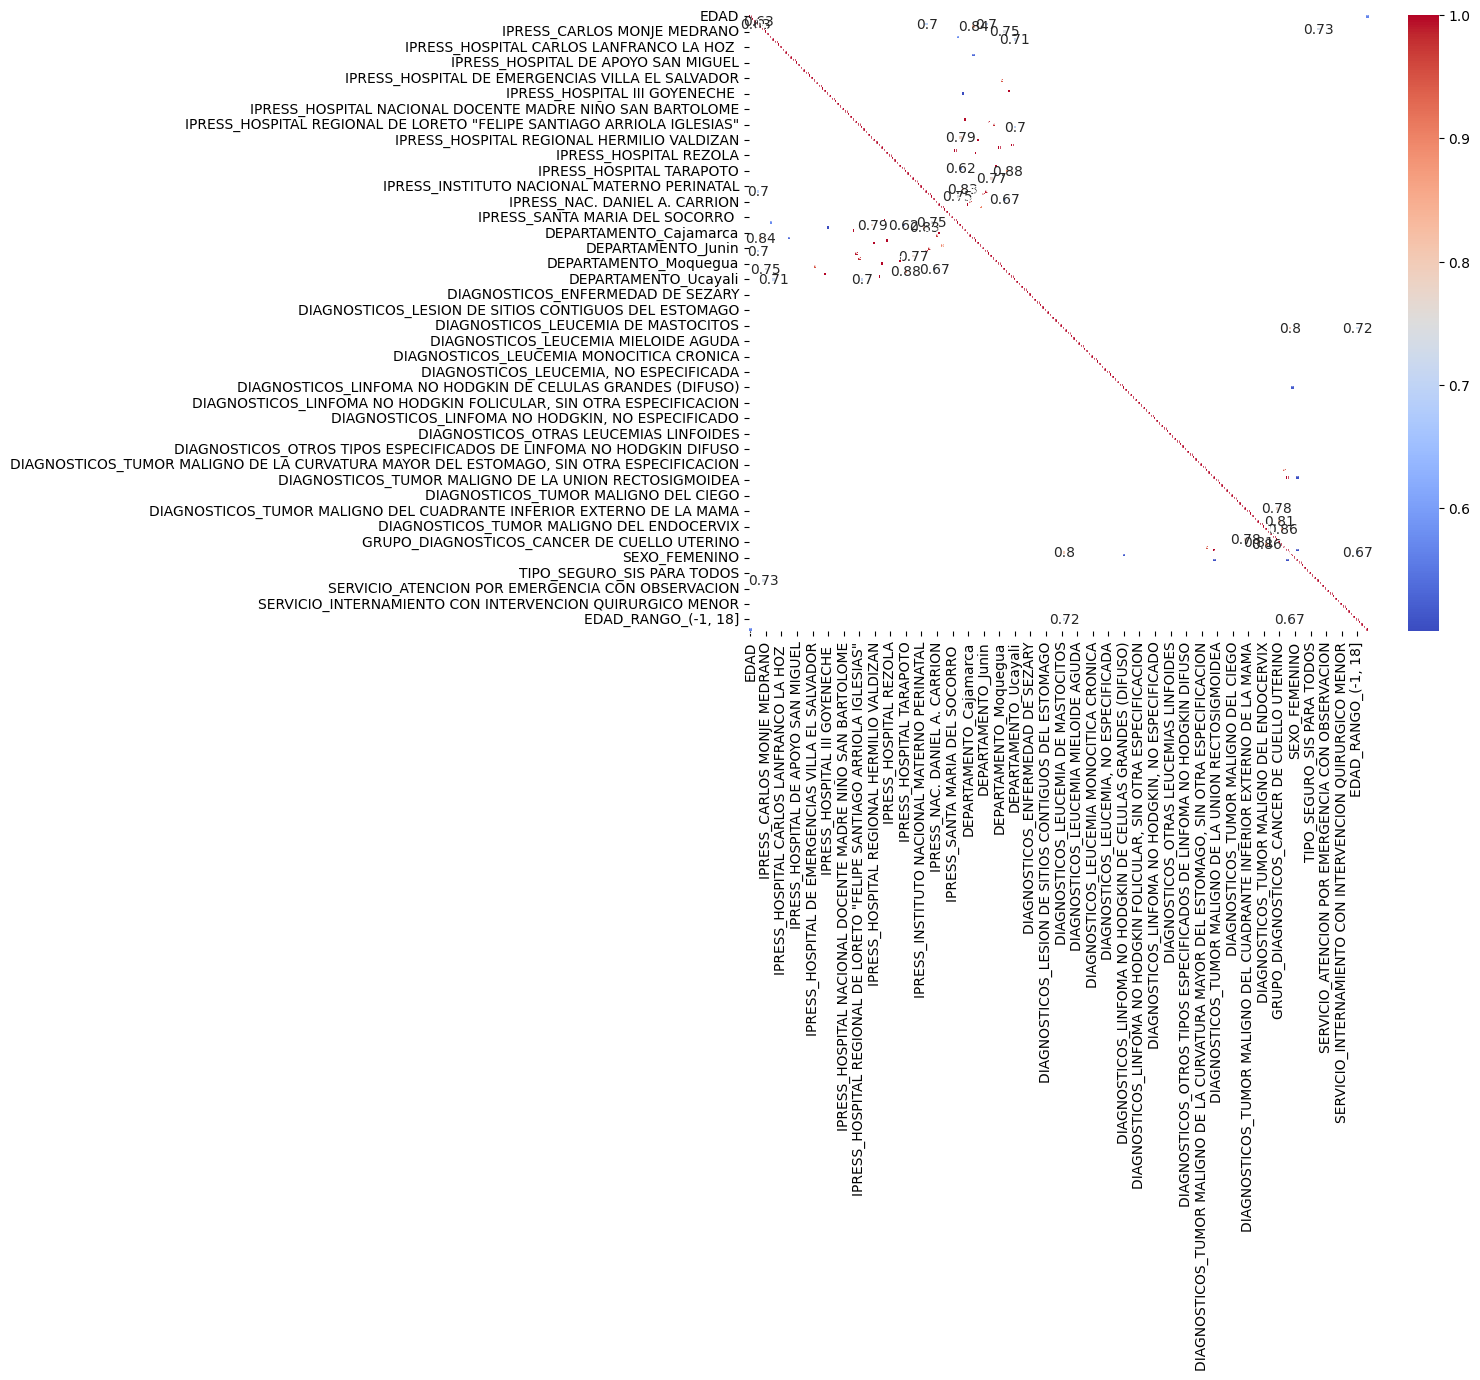

In [57]:
corrmat = data2.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmat[corrmat>0.5], vmax=1, cmap="coolwarm", annot=True)
plt.show()

In [58]:
data2.describe()

,EDAD,MONTO_BRUTO,INTERNAMIENTO,ALTA,IPRESS_ANTONIO LORENA DEL CUSCO,IPRESS_ATENCION DOMICILIARIA AL ADULTO MAYOR Y PACIENTE ONCOLOGICO (ADAMO),IPRESS_CARLOS MONJE MEDRANO,IPRESS_DE APOYO FELIX MAYORCA SOTO,IPRESS_ELEAZAR GUZMAN BARRON,IPRESS_HOSPITAL AMAZONICO - YARINACOCHA,IPRESS_HOSPITAL APLAO,IPRESS_HOSPITAL BELEN DE TRUJILLO,IPRESS_HOSPITAL CARLOS LANFRANCO LA HOZ,IPRESS_HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS,"IPRESS_HOSPITAL CHANCAY Y SBS ""DR. HIDALGO ATOCHE LOPEZ""",IPRESS_HOSPITAL DE APOYO DEPARTAMENTAL DEL CUSCO,IPRESS_HOSPITAL DE APOYO II - 2 SULLANA,IPRESS_HOSPITAL DE APOYO JESUS NAZARENO,IPRESS_HOSPITAL DE APOYO SAN MIGUEL,IPRESS_HOSPITAL DE APOYO SANTA ROSA,IPRESS_HOSPITAL DE BARRANCA,IPRESS_HOSPITAL DE CAMANA,IPRESS_HOSPITAL DE EMERGENCIAS JOSE CASIMIRO ULLOA,IPRESS_HOSPITAL DE EMERGENCIAS PEDIATRICAS,IPRESS_HOSPITAL DE EMERGENCIAS VILLA EL SALVADOR,IPRESS_HOSPITAL DE LA AMISTAD PERU - COREA SANTA ROSA II-2,IPRESS_HOSPITAL DE MEDIANA COMPLEJIDAD JOSE AGURTO TELLO,IPRESS_HOSPITAL EMERGENCIA ATE VITARTE,IPRESS_HOSPITAL GENERAL DE HUACHO,IPRESS_HOSPITAL HIPOLITO UNANUE DE TACNA,IPRESS_HOSPITAL III GOYENECHE,"IPRESS_HOSPITAL IQUITOS ""CESAR GARAYAR GARCÍA""",IPRESS_HOSPITAL MARIA AUXILIADORA,IPRESS_HOSPITAL MOYOBAMBA,IPRESS_HOSPITAL NACIONAL ARZOBISPO LOAYZA,IPRESS_HOSPITAL NACIONAL CAYETANO HEREDIA,IPRESS_HOSPITAL NACIONAL DOCENTE MADRE NIÑO SAN BARTOLOME,IPRESS_HOSPITAL NACIONAL DOS DE MAYO,IPRESS_HOSPITAL NACIONAL HIPOLITO UNANUE,IPRESS_HOSPITAL NACIONAL SERGIO BERNALES,"IPRESS_HOSPITAL REGIONAL DE AYACUCHO ""MIGUEL ANGEL MARISCAL LLERENA""",IPRESS_HOSPITAL REGIONAL DE LAMBAYEQUE,"IPRESS_HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO ARRIOLA IGLESIAS""",IPRESS_HOSPITAL REGIONAL DE PUCALLPA,IPRESS_HOSPITAL REGIONAL DOCENTE CLINICO QUIRURGICO DANIEL ALCIDES CARRION DE HUANCAYO,IPRESS_HOSPITAL REGIONAL DOCENTE DE MEDICINA TROPICAL DR. JULIO CESAR DEMARINI CARO,IPRESS_HOSPITAL REGIONAL DOCENTE LAS MERCEDES,IPRESS_HOSPITAL REGIONAL GUILLERMO DIAZ DE LA VEGA,IPRESS_HOSPITAL REGIONAL HERMILIO VALDIZAN,IPRESS_HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,IPRESS_HOSPITAL REGIONAL JOSE ALFREDO MENDOZA OLAVARRIA JAMO II-2,IPRESS_HOSPITAL REGIONAL MOQUEGUA,IPRESS_HOSPITAL REGIONAL VIRGEN DE FATIMA,IPRESS_HOSPITAL REGIONAL ZACARIAS CORREA VALDIVIA,IPRESS_HOSPITAL REZOLA,IPRESS_HOSPITAL SAN JOSE,IPRESS_HOSPITAL SAN JUAN BAUTISTA HUARAL,IPRESS_HOSPITAL SAN JUAN DE LURIGANCHO,IPRESS_HOSPITAL SANTA ROSA,IPRESS_HOSPITAL SUB REGIONAL DE ANDAHUAYLAS,IPRESS_HOSPITAL TARAPOTO,IPRESS_HOSPITAL VICTOR RAMOS GUARDIA - HUARAZ,IPRESS_INSTITUTO NACIONAL DE CIENCIAS NEUROLOGICAS,IPRESS_INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS - INEN,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - BREÑA,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - SAN BORJA,IPRESS_INSTITUTO NACIONAL MATERNO PERINATAL,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS – LUIS PINILLOS GANOZA - IREN,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO – IREN CENTRO,IPRESS_LA CALETA,IPRESS_MANUEL NUÑEZ BUTRON,IPRESS_NAC. DANIEL A. CARRION,IPRESS_REGIONAL DE CAJAMARCA,IPRESS_REGIONAL DE ICA,IPRESS_REGIONAL DOCENTE DE TRUJILLO,"IPRESS_REGIONAL DOCENTE MATERNO INFANTIL ""EL CARMEN""",IPRESS_SAN JOSE,IPRESS_SANTA MARIA DEL SOCORRO,DEPARTAMENTO_Amazonas,DEPARTAMENTO_Ancash,DEPARTAMENTO_Apurimac,DEPARTAMENTO_Arequipa,DEPARTAMENTO_Ayacucho,DEPARTAMENTO_Cajamarca,DEPARTAMENTO_Callao,DEPARTAMENTO_Cusco,DEPARTAMENTO_Huancavelica,DEPARTAMENTO_Huanuco,DEPARTAMENTO_Ica,DEPARTAMENTO_Junin,DEPARTAMENTO_La Libertad,DEPARTAMENTO_Lambayeque,DEPARTAMENTO_Lima,DEPARTAMENTO_Loreto,DEPARTAMENTO_Madre de Dios,DEPARTAMENTO_Moquegua,DEPARTAMENTO_Piura,DEPARTAMENTO_Puno,DEPARTAMENTO_San Martin,DEPARTAMENTO_Tacna,DEPARTAMENTO_Tumbes,DEPARTAMENTO_Ucayali,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON CELULARIDAD MIXTA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON DEPLECION LINFOCITICA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON ESCLEROSIS

In [59]:
from sklearn.preprocessing import StandardScaler
feat_scaled = data2[["EDAD", "MONTO_BRUTO"]]
scaled = StandardScaler().fit_transform(feat_scaled)
df_scaled = pd.DataFrame(scaled, columns=["EDAD_S", "MONTO_BRUTO_S"])
df_scaled.describe()

,EDAD_S,MONTO_BRUTO_S
count,8.199330e+05,8.199330e+05
mean,-2.039641e-16,-1.928155e-19
std,1.000001e+00,1.000001e+00
min,-2.690538e+00,-1.078565e-01
25%,-5.104328e-01,-1.032981e-01
50%,1.124544e-01,-9.294468e-02
75%,7.353416e-01,-6.610929e-02
max,2.811632e+00,1.148098e+02


In [60]:
data_scaled = pd.concat([df_scaled, data2], axis = 1)
data_scaled.drop(["EDAD", "MONTO_BRUTO"], axis = 1, inplace=True)
data_scaled.head()

,EDAD_S,MONTO_BRUTO_S,INTERNAMIENTO,ALTA,IPRESS_ANTONIO LORENA DEL CUSCO,IPRESS_ATENCION DOMICILIARIA AL ADULTO MAYOR Y PACIENTE ONCOLOGICO (ADAMO),IPRESS_CARLOS MONJE MEDRANO,IPRESS_DE APOYO FELIX MAYORCA SOTO,IPRESS_ELEAZAR GUZMAN BARRON,IPRESS_HOSPITAL AMAZONICO - YARINACOCHA,IPRESS_HOSPITAL APLAO,IPRESS_HOSPITAL BELEN DE TRUJILLO,IPRESS_HOSPITAL CARLOS LANFRANCO LA HOZ,IPRESS_HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS,"IPRESS_HOSPITAL CHANCAY Y SBS ""DR. HIDALGO ATOCHE LOPEZ""",IPRESS_HOSPITAL DE APOYO DEPARTAMENTAL DEL CUSCO,IPRESS_HOSPITAL DE APOYO II - 2 SULLANA,IPRESS_HOSPITAL DE APOYO JESUS NAZARENO,IPRESS_HOSPITAL DE APOYO SAN MIGUEL,IPRESS_HOSPITAL DE APOYO SANTA ROSA,IPRESS_HOSPITAL DE BARRANCA,IPRESS_HOSPITAL DE CAMANA,IPRESS_HOSPITAL DE EMERGENCIAS JOSE CASIMIRO ULLOA,IPRESS_HOSPITAL DE EMERGENCIAS PEDIATRICAS,IPRESS_HOSPITAL DE EMERGENCIAS VILLA EL SALVADOR,IPRESS_HOSPITAL DE LA AMISTAD PERU - COREA SANTA ROSA II-2,IPRESS_HOSPITAL DE MEDIANA COMPLEJIDAD JOSE AGURTO TELLO,IPRESS_HOSPITAL EMERGENCIA ATE VITARTE,IPRESS_HOSPITAL GENERAL DE HUACHO,IPRESS_HOSPITAL HIPOLITO UNANUE DE TACNA,IPRESS_HOSPITAL III GOYENECHE,"IPRESS_HOSPITAL IQUITOS ""CESAR GARAYAR GARCÍA""",IPRESS_HOSPITAL MARIA AUXILIADORA,IPRESS_HOSPITAL MOYOBAMBA,IPRESS_HOSPITAL NACIONAL ARZOBISPO LOAYZA,IPRESS_HOSPITAL NACIONAL CAYETANO HEREDIA,IPRESS_HOSPITAL NACIONAL DOCENTE MADRE NIÑO SAN BARTOLOME,IPRESS_HOSPITAL NACIONAL DOS DE MAYO,IPRESS_HOSPITAL NACIONAL HIPOLITO UNANUE,IPRESS_HOSPITAL NACIONAL SERGIO BERNALES,"IPRESS_HOSPITAL REGIONAL DE AYACUCHO ""MIGUEL ANGEL MARISCAL LLERENA""",IPRESS_HOSPITAL REGIONAL DE LAMBAYEQUE,"IPRESS_HOSPITAL REGIONAL DE LORETO ""FELIPE SANTIAGO ARRIOLA IGLESIAS""",IPRESS_HOSPITAL REGIONAL DE PUCALLPA,IPRESS_HOSPITAL REGIONAL DOCENTE CLINICO QUIRURGICO DANIEL ALCIDES CARRION DE HUANCAYO,IPRESS_HOSPITAL REGIONAL DOCENTE DE MEDICINA TROPICAL DR. JULIO CESAR DEMARINI CARO,IPRESS_HOSPITAL REGIONAL DOCENTE LAS MERCEDES,IPRESS_HOSPITAL REGIONAL GUILLERMO DIAZ DE LA VEGA,IPRESS_HOSPITAL REGIONAL HERMILIO VALDIZAN,IPRESS_HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,IPRESS_HOSPITAL REGIONAL JOSE ALFREDO MENDOZA OLAVARRIA JAMO II-2,IPRESS_HOSPITAL REGIONAL MOQUEGUA,IPRESS_HOSPITAL REGIONAL VIRGEN DE FATIMA,IPRESS_HOSPITAL REGIONAL ZACARIAS CORREA VALDIVIA,IPRESS_HOSPITAL REZOLA,IPRESS_HOSPITAL SAN JOSE,IPRESS_HOSPITAL SAN JUAN BAUTISTA HUARAL,IPRESS_HOSPITAL SAN JUAN DE LURIGANCHO,IPRESS_HOSPITAL SANTA ROSA,IPRESS_HOSPITAL SUB REGIONAL DE ANDAHUAYLAS,IPRESS_HOSPITAL TARAPOTO,IPRESS_HOSPITAL VICTOR RAMOS GUARDIA - HUARAZ,IPRESS_INSTITUTO NACIONAL DE CIENCIAS NEUROLOGICAS,IPRESS_INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS - INEN,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - BREÑA,IPRESS_INSTITUTO NACIONAL DE SALUD DEL NIÑO - SAN BORJA,IPRESS_INSTITUTO NACIONAL MATERNO PERINATAL,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS – LUIS PINILLOS GANOZA - IREN,IPRESS_INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS DEL CENTRO – IREN CENTRO,IPRESS_LA CALETA,IPRESS_MANUEL NUÑEZ BUTRON,IPRESS_NAC. DANIEL A. CARRION,IPRESS_REGIONAL DE CAJAMARCA,IPRESS_REGIONAL DE ICA,IPRESS_REGIONAL DOCENTE DE TRUJILLO,"IPRESS_REGIONAL DOCENTE MATERNO INFANTIL ""EL CARMEN""",IPRESS_SAN JOSE,IPRESS_SANTA MARIA DEL SOCORRO,DEPARTAMENTO_Amazonas,DEPARTAMENTO_Ancash,DEPARTAMENTO_Apurimac,DEPARTAMENTO_Arequipa,DEPARTAMENTO_Ayacucho,DEPARTAMENTO_Cajamarca,DEPARTAMENTO_Callao,DEPARTAMENTO_Cusco,DEPARTAMENTO_Huancavelica,DEPARTAMENTO_Huanuco,DEPARTAMENTO_Ica,DEPARTAMENTO_Junin,DEPARTAMENTO_La Libertad,DEPARTAMENTO_Lambayeque,DEPARTAMENTO_Lima,DEPARTAMENTO_Loreto,DEPARTAMENTO_Madre de Dios,DEPARTAMENTO_Moquegua,DEPARTAMENTO_Piura,DEPARTAMENTO_Puno,DEPARTAMENTO_San Martin,DEPARTAMENTO_Tacna,DEPARTAMENTO_Tumbes,DEPARTAMENTO_Ucayali,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON CELULARIDAD MIXTA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON DEPLECION LINFOCITICA,DIAGNOSTICOS_ENFERMEDAD DE HODGKIN CON ESCLER

In [61]:
data_scaled.shape

(819933, 239)

In [62]:
data_scaled.isna().sum().sum()

0

In [63]:
#data_scaled.to_csv("data_scaled2.csv", index=False)